In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib import colors as clrs
import matplotlib as mpl
%matplotlib inline

In [2]:
path_2 = '/data/user/zrechav/compiled_hdf5s/airshowered_corsika/Corsika_20904_5000.hdf5'
#path_2 = '/home/zrechav/test/AirShowerReader.hdf5'
file_2 = h5py.File(path_2,'r')

In [3]:
sorted(file_2.keys())

['CorsikaWeightMap',
 'GaisserH4a_weight',
 'I3EventHeader',
 'MuonMultiplicity_UnCorr',
 'Muon_UnCorr_Energy_L1',
 'Muon_UnCorr_Energy_L2',
 'Muon_UnCorr_Energy_L3',
 'Muon_UnCorr_Energy_L4',
 'Muon_UnCorr_Energy_L5',
 'Muon_UnCorr_L1',
 'Muon_UnCorr_L1_Depth',
 'Muon_UnCorr_L1_Neutrino_separation',
 'Muon_UnCorr_L1_Shower_separation',
 'Muon_UnCorr_L2',
 'Muon_UnCorr_L2_Depth',
 'Muon_UnCorr_L2_Neutrino_separation',
 'Muon_UnCorr_L2_Shower_separation',
 'Muon_UnCorr_L3',
 'Muon_UnCorr_L3_Depth',
 'Muon_UnCorr_L3_Neutrino_separation',
 'Muon_UnCorr_L3_Shower_separation',
 'Muon_UnCorr_L4',
 'Muon_UnCorr_L4_Depth',
 'Muon_UnCorr_L4_Neutrino_separation',
 'Muon_UnCorr_L4_Shower_separation',
 'Muon_UnCorr_L5',
 'Muon_UnCorr_L5_Depth',
 'Muon_UnCorr_L5_Neutrino_separation',
 'Muon_UnCorr_L5_Shower_separation',
 'PolyplopiaPrimary',
 'PolyplopiaPrimaryCopy',
 'PrimaryMass',
 'ShowerNeutrino',
 'Total_UnCorr_Muon_energy',
 '__I3Index__',
 'shower_neutrino_depth',
 'shower_neutrino_energy',


In [4]:
def count_nonzero_elements(arr):
    count = 0
    for element in arr:
        if element != 0:
            count += 1
    return count

# Example usage:
my_array = [1, 0, 3, 0, 5, 0, 7]
result = count_nonzero_elements(my_array)
print(f"The number of nonzero elements in the array is: {result}")

The number of nonzero elements in the array is: 4


In [7]:

uncorr_energy_one = file_2['Muon_UnCorr_L1']['energy']
uncorr_energy_two = file_2['Muon_UnCorr_L2']['energy']
uncorr_energy_three = file_2['Muon_UnCorr_L3']['energy']
uncorr_energy_four = file_2['Muon_UnCorr_L4']['energy']
uncorr_energy_five = file_2['Muon_UnCorr_L5']['energy']



In [5]:
test_one = file_2['Muon_UnCorr_Energy_L1']['value']
test_two = file_2['Muon_UnCorr_Energy_L2']['value']
test_three = file_2['Muon_UnCorr_Energy_L3']['value']
test_four = file_2['Muon_UnCorr_Energy_L4']['value']
test_five = file_2['Muon_UnCorr_Energy_L5']['value']
print('Total Events: ',len(test_one))
result_one = count_nonzero_elements(test_one)
print(f"Nonzero elements of L1: {result_one}")
result_two = count_nonzero_elements(test_two)
print(f"Nonzero elements of L2: {result_two}")
result_three = count_nonzero_elements(test_three)
print(f"Nonzero elements of L3: {result_three}")
result_four = count_nonzero_elements(test_four)
print(f"Nonzero elements of L4: {result_four}")
result_five = count_nonzero_elements(test_five)
print(f"Nonzero elements of L5: {result_five}")

Total Events:  7030110
Nonzero elements of L1: 2049
Nonzero elements of L2: 584
Nonzero elements of L3: 438
Nonzero elements of L4: 389
Nonzero elements of L5: 338


In [11]:

neutrino_depth = file_2['shower_neutrino_depth']['value']

In [21]:
shower_neutrino_energy = file_2['shower_neutrino_energy']['value']
neutrino_zenith = file_2['shower_neutrino_zenith']['value']
gaisser_weights = file_2['GaisserH4a_weight']['item']
leading_muon_energy = file_2['Muon_UnCorr_Energy_L1']['value']

In [26]:
def get_lists(neutrino_energy,neutrino_zenith,weight,muon_energy,e_min,e_max):
    energies = []
    zeniths = []
    weights = []
    muon_mask = [val!=0 for val in muon_energy]
    print(len(neutrino_energy))
    neutrino_energy = neutrino_energy[muon_mask]
    print(len(neutrino_energy))
    neutrino_zenith = neutrino_zenith[muon_mask]
    weight = weight[muon_mask]
    for i in range(len(neutrino_energy)):
        if neutrino_energy[i] > e_min and neutrino_energy[i] < e_max:
            energies.append(neutrino_energy[i])
            zeniths.append(np.cos(neutrino_zenith[i]))
            weights.append(weight[i])
    return (zeniths,weights)

In [27]:
over_100000 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,leading_muon_energy,1e5,1e12)
over_10000 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,leading_muon_energy,1e4,1e12)
over_1000 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,leading_muon_energy,1e3,1e12)
over_500 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,leading_muon_energy,5e2,1e12)
#over_100 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,1e2,1e12)
#over_100_500 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,100.,500.)
#over_10_100 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,10.,100.)
#over_1_10 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,1.,10.)
#over_0_1 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,0.,1.)
#over_1 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,1.,1e12)
over_0 = get_lists(shower_neutrino_energy,neutrino_zenith,gaisser_weights,leading_muon_energy,0.,1e12)

7030110
2049
7030110
2049
7030110
2049
7030110
2049
7030110
2049


In [25]:
len(over_0[0])

2049

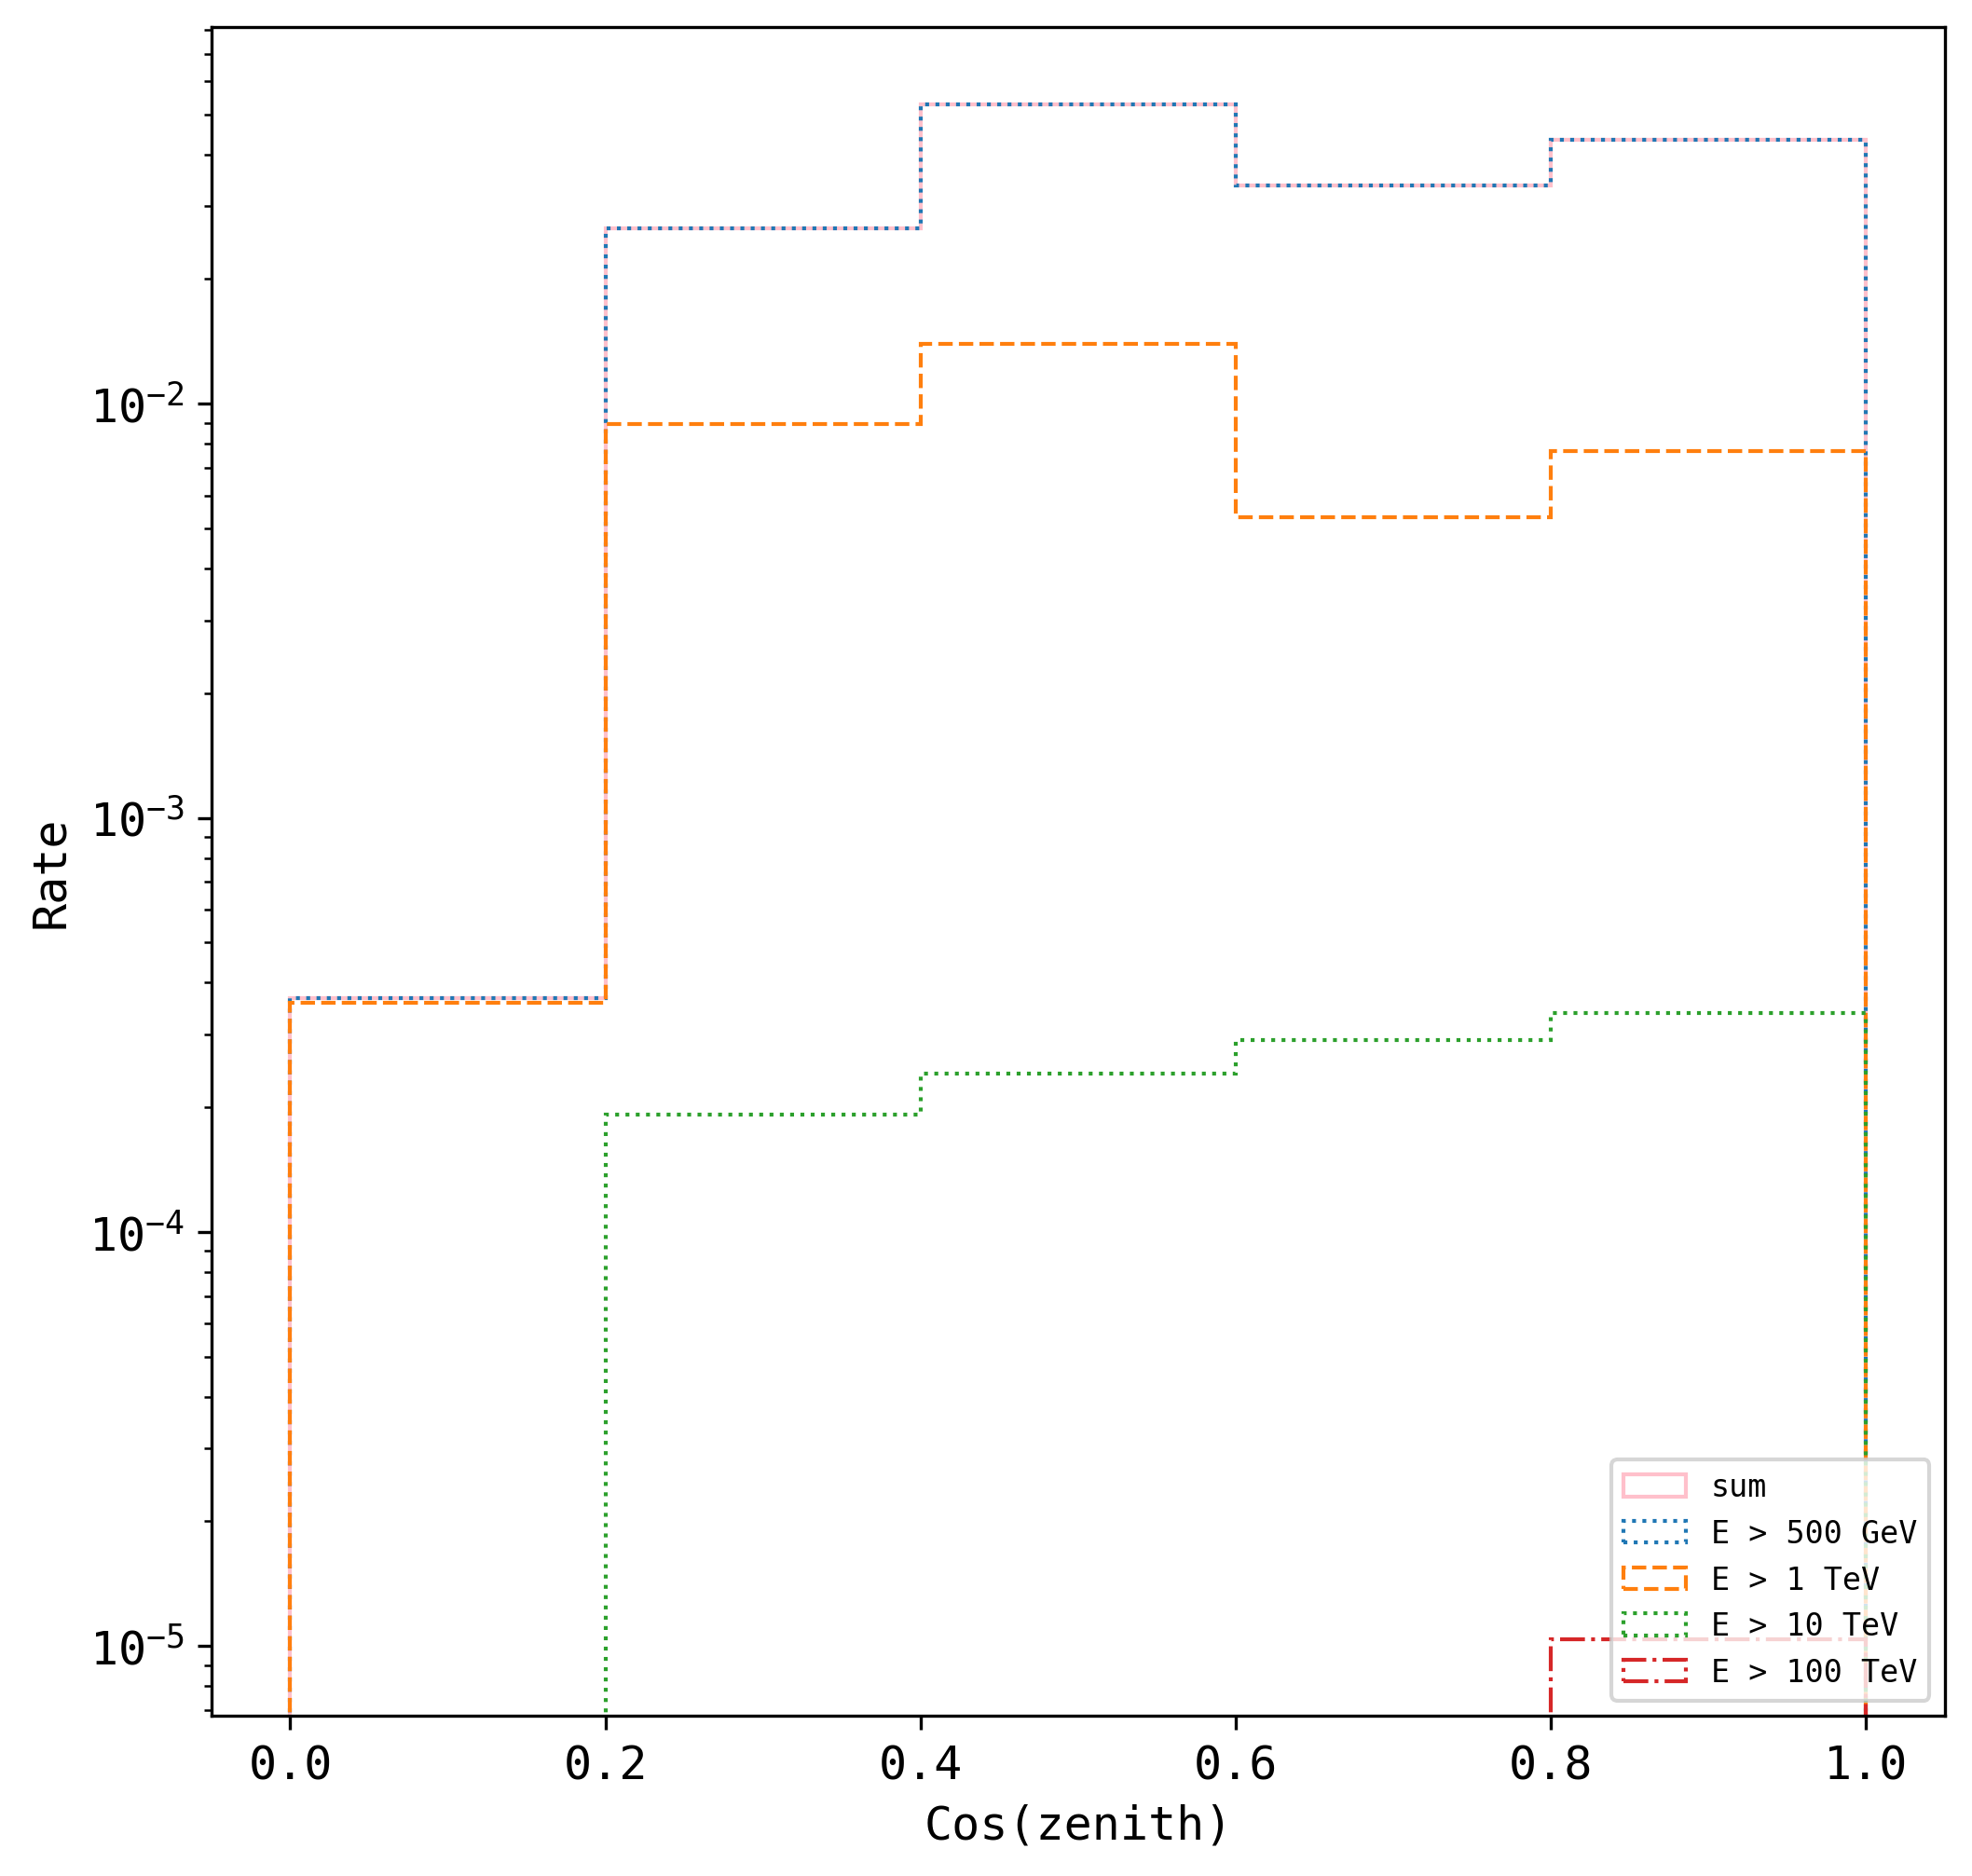

In [28]:
f, ax = plt.subplots(1,1,figsize=(8,8), dpi = 300)
mpl.rcParams["font.family"] = 'monospace'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['font.size']=12.0
zenith_bins = np.linspace(0.,1.,6)
ax.hist(over_0[0],weights = over_0[1],bins = zenith_bins,histtype='step',
        label = 'sum',linestyle = 'solid',color='pink')
#ax.hist(over_100[0],weights = over_100[1],bins = zenith_bins,histtype='step',
#       linestyle = 'dashed',label = 'E > 100 GeV')
ax.hist(over_500[0],weights = over_500[1],bins = zenith_bins,histtype='step',
       label = 'E > 500 GeV',linestyle = 'dotted')
ax.hist(over_1000[0],weights = over_1000[1],bins = zenith_bins,histtype='step',
       label = 'E > 1 TeV',linestyle = 'dashed')
ax.hist(over_10000[0],weights = over_10000[1],bins = zenith_bins,histtype='step',
       label = 'E > 10 TeV',linestyle = 'dotted')
ax.hist(over_100000[0],weights = over_100000[1],bins = zenith_bins,histtype='step',
       label = 'E > 100 TeV',linestyle = 'dashdot')
#ax.hist(over_1[0],weights = over_1[1],bins = zenith_bins,histtype='step',
#       label = 'E > 1 GeV',linestyle = 'dashdot')
#ax.hist(over_100_500[0],weights = over_100_500[1],bins = zenith_bins,histtype='step',
#       label = '100 GeV < E < 500 GeV',linestyle = 'dashed')
#ax.hist(over_10_100[0],weights = over_10_100[1],bins = zenith_bins,histtype='step',
#       label = '10 GeV < E < 100 GeV',linestyle = 'dotted')
#ax.hist(over_1_10[0],weights = over_1_10[1],bins = zenith_bins,histtype='step',
#       label = '1 GeV < E < 10 GeV')
#ax.hist(over_0_1[0],weights = over_0_1[1],bins = zenith_bins,histtype='step',
#       label = '0 GeV < E < 1 GeV',linestyle = 'dashed')


ax.set_xlabel('Cos(zenith)')
ax.set_ylabel('Rate')
ax.legend(fontsize=8, loc = 4)
ax.set_yscale('log')

In [28]:
5e2

500.0

In [14]:
len(over_0[0])

745290

In [15]:
len(shower_neutrino_energy)

817973

In [16]:
muon_mask = [val!=0 for val in file_2['Muon_UnCorr_Energy_L1']['value']
            ]

[0. 0. 0. 0. 0.]
[ 742.56264061  662.05247633    0.          848.53099047 2190.15217884]


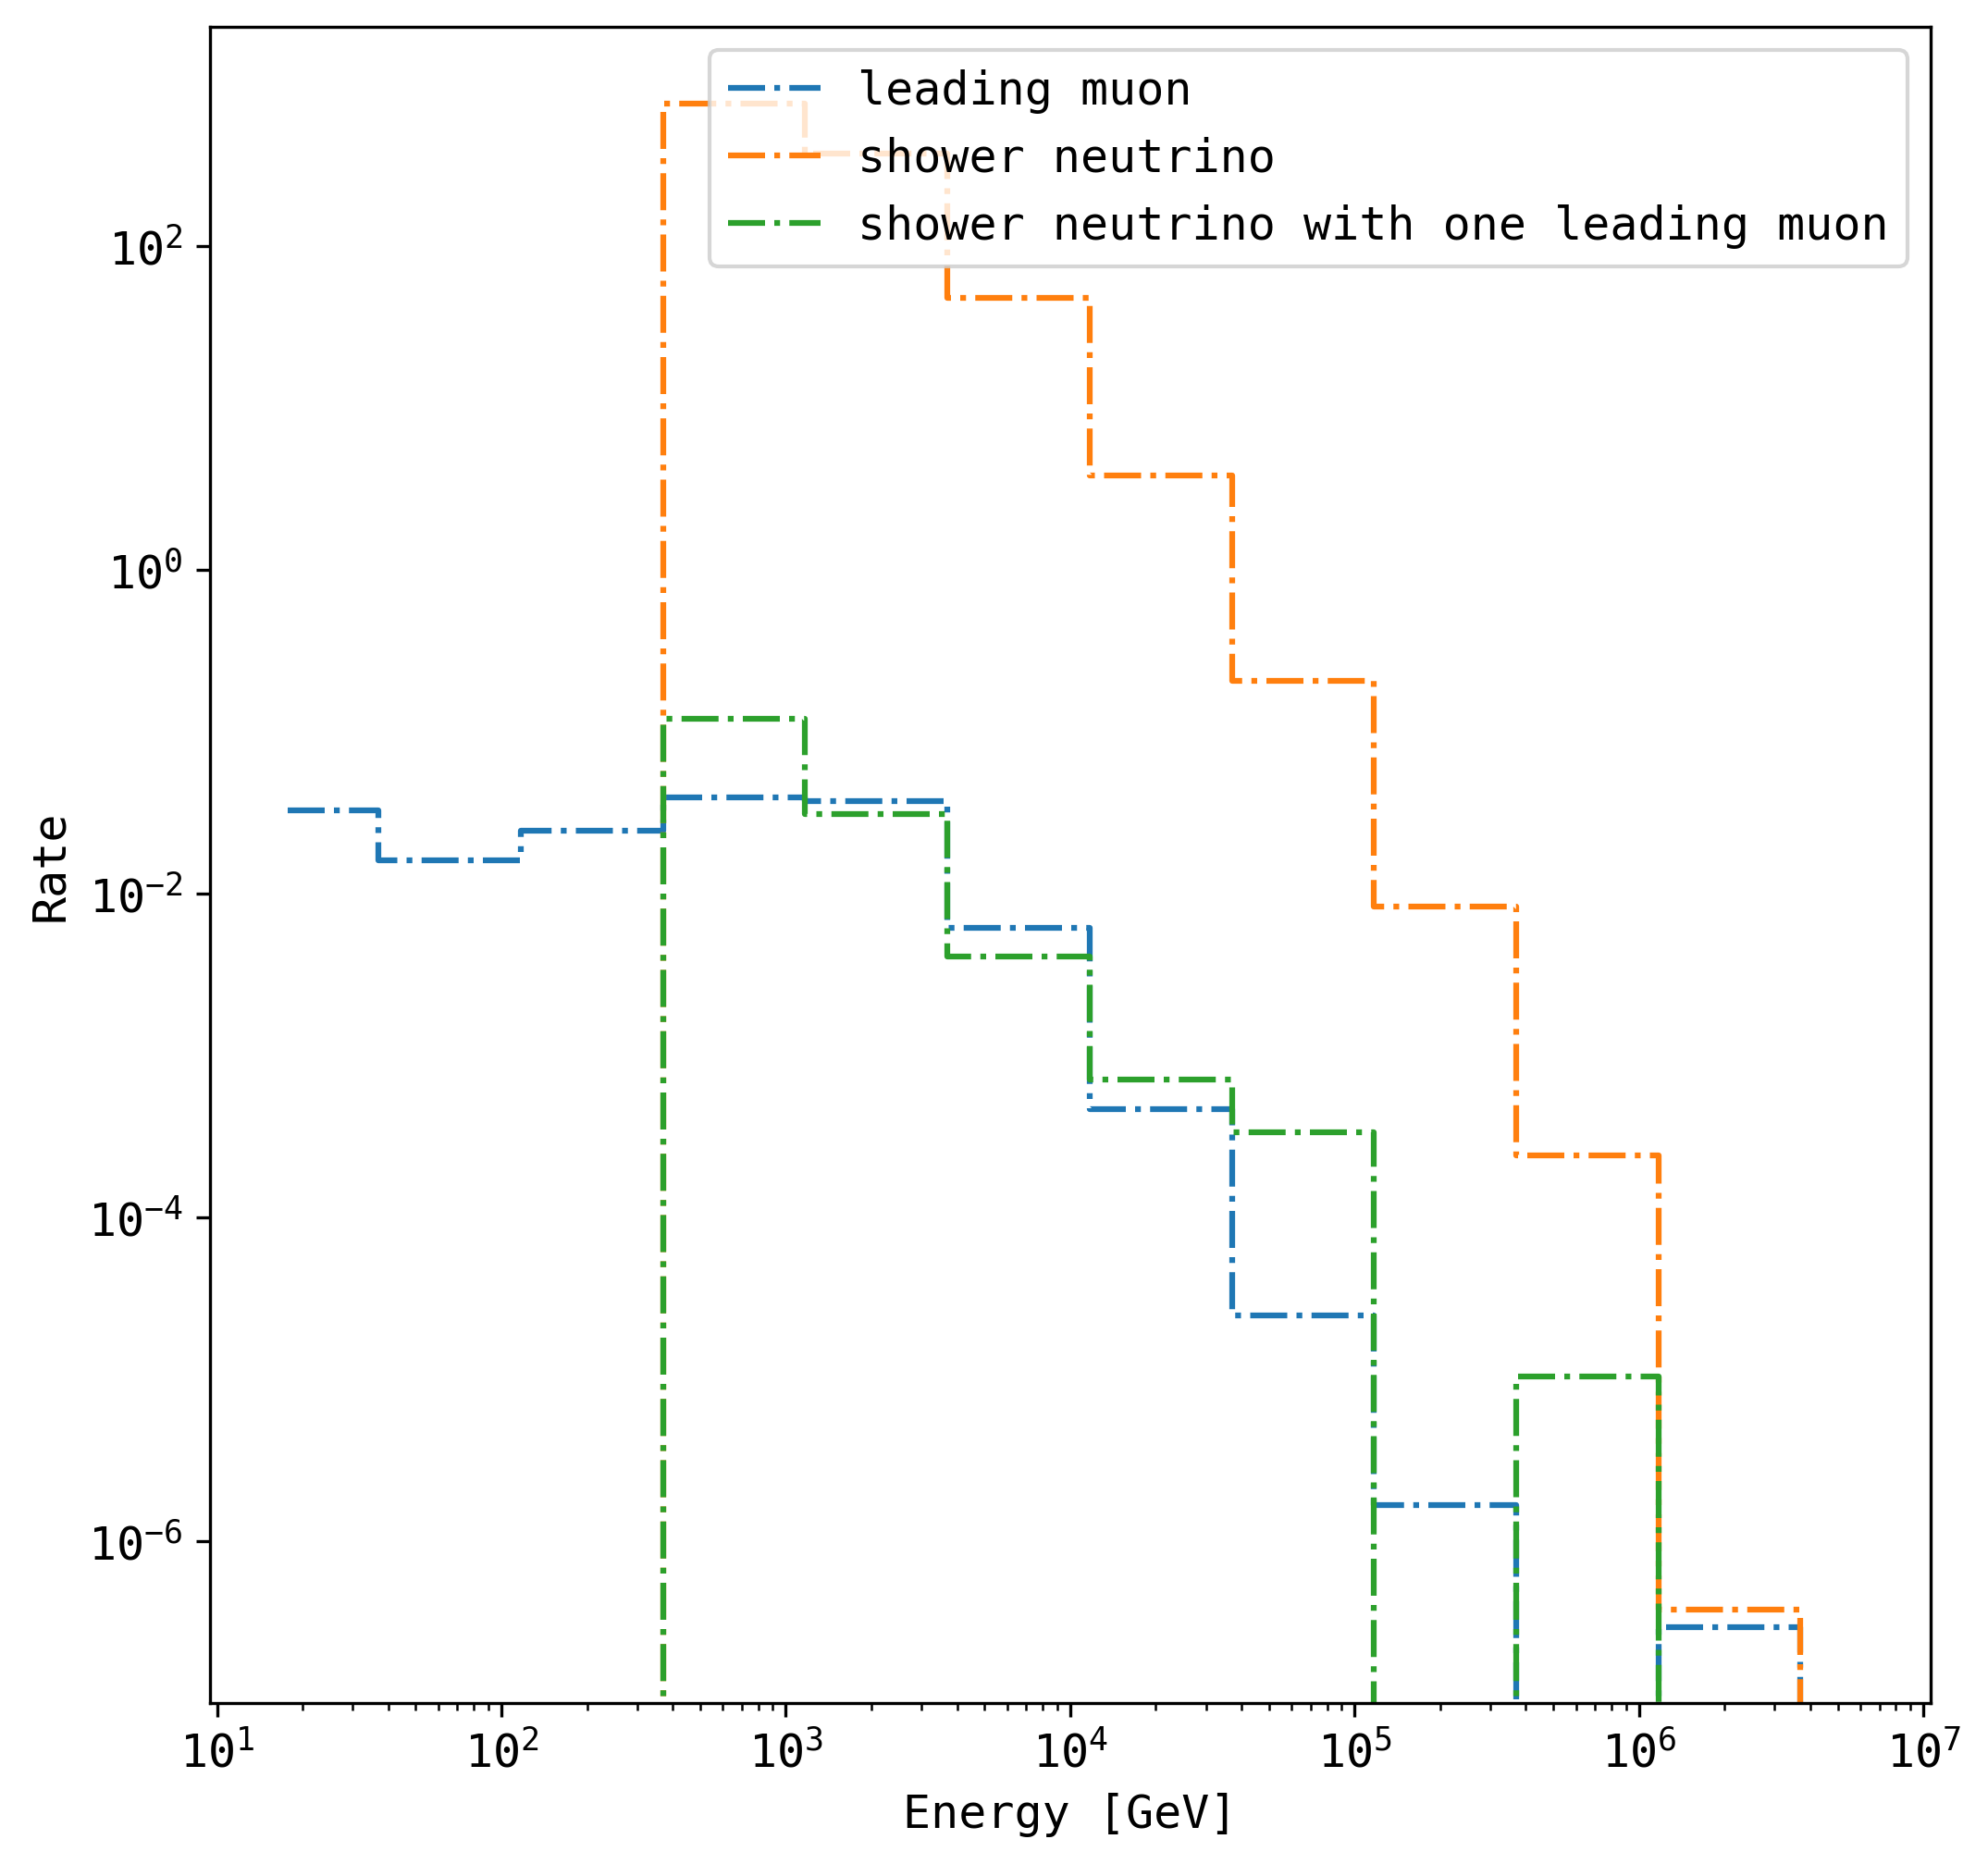

In [20]:
##Make energy distribution for muons and neutrino energies
leading_muon_energy = file_2['Muon_UnCorr_Energy_L1']['value']
neutrino_energy = file_2['shower_neutrino_energy']['value']

print(leading_muon_energy[:5])
print(neutrino_energy[:5])
gaisser_weights = file_2['GaisserH4a_weight']['item']
E_mu_bins = np.logspace(1,7,12+1)
E_nu_bins = np.logspace(1,7,12+1)
mu_bin_centers = np.sqrt(E_mu_bins[:-1] * E_mu_bins[1:])
nu_bin_centers = np.sqrt(E_nu_bins[:-1] * E_nu_bins[1:])

f, ax = plt.subplots(1,1,figsize=(8,8), dpi = 300)
mpl.rcParams["font.family"] = 'monospace'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['font.size']=12.0

muons,_ = np.histogram(leading_muon_energy,
                     bins=E_mu_bins
                     ,weights=gaisser_weights)
ax.step(mu_bin_centers,muons,label='leading muon',where='mid',linestyle='dashdot')

nus,_ = np.histogram(neutrino_energy,
                     bins=E_nu_bins
                     ,weights=gaisser_weights)
ax.step(nu_bin_centers,nus,label='shower neutrino',where='mid',linestyle='dashdot')
muon_mask = [val!=0 for val in leading_muon_energy]
            
cut_nus,_ = np.histogram(neutrino_energy[muon_mask],
                     bins=E_nu_bins
                     ,weights=gaisser_weights[muon_mask])
ax.step(nu_bin_centers,cut_nus,label='shower neutrino with one leading muon',
        where='mid',linestyle='dashdot')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel('Rate')
plt.legend()
plt.show()

In [ ]:
##Make energy distribution for muons and neutrino energies
leading_muon_energy = file_2['Muon_UnCorr_Energy_L1']['value']
neutrino_energy = file_2['shower_neutrino_energy']['value']
neutrino_zenith = file_2['shower_neutrino_zenith']['value']
print(leading_muon_energy[:5])
print(neutrino_energy[:5])
gaisser_weights = file_2['GaisserH4a_weight']['item']
E_mu_bins = np.logspace(1,7,12+1)
E_nu_bins = np.logspace(1,7,12+1)
mu_bin_centers = np.sqrt(E_mu_bins[:-1] * E_mu_bins[1:])
nu_bin_centers = np.sqrt(E_nu_bins[:-1] * E_nu_bins[1:])
Zen_bins = np.linspace(0,1,6)
Zen_bin_centers = np.sqrt(Zen_bins[:-1]*Zen_bins[1:0])
f, ax = plt.subplots(1,1,figsize=(8,8), dpi = 300)
mpl.rcParams["font.family"] = 'monospace'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['font.size']=12.0

muons,_ = np.histogram(leading_muon_energy,
                     bins=E_mu_bins
                     ,weights=gaisser_weights)
ax.step(mu_bin_centers,muons,label='leading muon',where='mid',linestyle='dashdot')

nus,_ = np.histogram(neutrino_energy,
                     bins=E_nu_bins
                     ,weights=gaisser_weights)
ax.step(nu_bin_centers,nus,label='shower neutrino',where='mid',linestyle='dashdot')
muon_mask = [val!=0 for val in leading_muon_energy]
            
cut_nus,_ = np.histogram(neutrino_energy[muon_mask],
                     bins=E_nu_bins
                     ,weights=gaisser_weights[muon_mask])
ax.step(nu_bin_centers,cut_nus,label='shower neutrino with one leading muon',
        where='mid',linestyle='dashdot')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy [GeV]')
plt.ylabel('Rate')
plt.legend()
plt.show()